## <font color='red'>箱线图如何处理异常值？</font>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 示例数据，假设您有一个名为 "data" 的 DataFrame，包含一列数据 "values"。
data = pd.DataFrame({'values': [10, 12, 14, 16, 18, 20, 22, 24, 26, 60]})
data

,values
0,10
1,12
2,14
3,16
4,18
5,20
6,22
7,24
8,26
9,60


<AxesSubplot:>

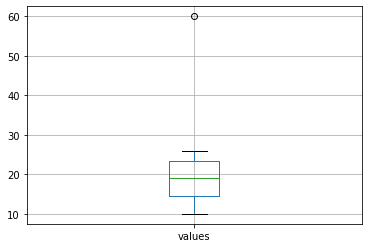

In [11]:
data.boxplot(column='values')

In [14]:
# 查找异常值
q1 = data['values'].quantile(0.25)
q3 = data['values'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

cond = (data['values'] < lower_bound) | (data['values'] > upper_bound)
data[cond]

,values
9,60


In [15]:
data['values'][cond] = data['values'].median()
data

,values
0,10
1,12
2,14
3,16
4,18
5,20
6,22
7,24
8,26
9,19


<AxesSubplot:>

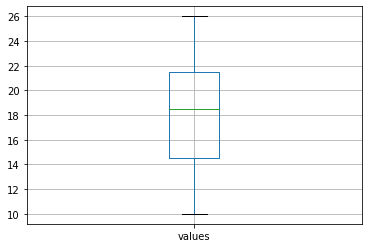

In [16]:
data.boxplot(column='values')

## <font color='red'>如何通过插值法处理异常值？</font>

In [23]:
import pandas as pd
import numpy as np

# 示例数据，假设您有一个名为 "data" 的 DataFrame，包含一列数据 "values"。
data = pd.DataFrame({'values': [10, 12, 14, 16, 18, 20, 22, 24, 26, 100,32,36,38]})

# 查找异常值
q1 = data['values'].quantile(0.25)
q3 = data['values'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
cond = (data['values'] < lower_bound) | (data['values'] > upper_bound)

data['values'][cond] = np.nan
data

,values
0,10.0
1,12.0
2,14.0
3,16.0
4,18.0
5,20.0
6,22.0
7,24.0
8,26.0
9,NaN


In [24]:
data['values'].interpolate()

0     10.0
1     12.0
2     14.0
3     16.0
4     18.0
5     20.0
6     22.0
7     24.0
8     26.0
9     29.0
10    32.0
11    36.0
12    38.0
Name: values, dtype: float64

In [21]:
import pandas as pd

# 创建一个包含NaN的示例DataFrame
data = {'A': [1, 2, np.nan, np.nan, np.nan,5, 6, np.nan, 8, 9]}
df = pd.DataFrame(data)

# 使用limit为2进行插值
interpolated_df = df.interpolate(limit=2)

display(interpolated_df)


,A
0,1.00
1,2.00
2,2.75
3,3.50
4,4.25
5,5.00
6,6.00
7,7.00
8,8.00
9,9.00


## <font color='red'>map函数如何通过字典转换数据？</font>

In [28]:
import pandas as pd

# 示例数据，假设您有一个名为 "data" 的 DataFrame，包含一列数据 "values"。
data = pd.DataFrame({'values': ['A', 'B', 'C', 'A', 'B', 'C','D','A',np.nan,'E','C']})

# 字典映射关系
mapping_dict = {'A': 1, 'B': 2, 'C': 3,np.nan:1024}
data

,values
0,A
1,B
2,C
3,A
4,B
5,C
6,D
7,A
8,NaN
9,E


In [ ]:
pd.Series.map()

In [29]:
data['values'].map(mapping_dict)

0        1.0
1        2.0
2        3.0
3        1.0
4        2.0
5        3.0
6        NaN
7        1.0
8     1024.0
9        NaN
10       3.0
Name: values, dtype: float64

In [30]:
s = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
s

0       cat
1       dog
2       NaN
3    rabbit
dtype: object

In [31]:
s.map('I am a {}'.format)

0       I am a cat
1       I am a dog
2       I am a nan
3    I am a rabbit
dtype: object

In [32]:
s.map('I am a {}'.format,na_action='ignore')

0       I am a cat
1       I am a dog
2              NaN
3    I am a rabbit
dtype: object

## <font color='red'>map如何结合函数转换数据？</font>

In [34]:
import pandas as pd

# 示例数据，假设您有一个名为 "data" 的 DataFrame，包含一列数据 "values"。
data = pd.DataFrame({'values': [1, 2, 3, 4, 5]})
display(data)

# 定义一个自定义函数，将每个元素加上 10 并返回
def custom_function(x):
    return x + 10

# 使用 map() 方法通过自定义函数转换数据
data['values'] = data['values'].map(custom_function)
data

,values
0,1
1,2
2,3
3,4
4,5


,values
0,11
1,12
2,13
3,14
4,15


In [35]:
data['values'].map(lambda x : x + 100)

0    111
1    112
2    113
3    114
4    115
Name: values, dtype: int64

In [36]:
data

,values
0,11
1,12
2,13
3,14
4,15


In [37]:
import numpy as np
s = pd.Series(np.random.randint(0,100,size = 100),name = 'Python')
s

0     73
1      3
2     16
3      7
4     54
      ..
95    96
96    80
97    86
98    92
99    70
Name: Python, Length: 100, dtype: int32

In [40]:
def convert(x):
    if x < 60:
        return '不及格'
    elif x < 80:
        return '中等'
    elif x < 90:
        return '良好'
    else:
        return '优秀'

s2 = s.map(convert)
s2

0      中等
1     不及格
2     不及格
3     不及格
4     不及格
     ... 
95     优秀
96     良好
97     良好
98     优秀
99     中等
Name: Python, Length: 100, dtype: object

In [41]:
pd.DataFrame({'Python':s,'等级':s2})

,Python,等级
0,73,中等
1,3,不及格
2,16,不及格
3,7,不及格
4,54,不及格
...,...,...
95,96,优秀
96,80,良好
97,86,良好
98,92,优秀


## <font color='red'>apply函数如何进行数据转变？</font>

In [46]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data = np.random.randint(0,10,size = (10,3)),
                  index = list('ABCDEFHIJK'),
                  columns=['Python','Math','Chinese'])
df.iloc[4,2] = None # 空数据
display(df)
# 1、apply 应用方法数据转换，通用
# Series，其中x是Series中元素
df['Math'].apply(lambda x:True if x >5 else False) 

,Python,Math,Chinese
A,8,9,2.0
B,2,1,0.0
C,5,2,7.0
D,3,4,7.0
E,4,5,NaN
F,1,4,5.0
H,3,2,6.0
I,3,7,4.0
J,6,4,6.0
K,7,0,1.0


A     True
B    False
C    False
D    False
E    False
F    False
H    False
I     True
J    False
K    False
Name: Math, dtype: bool

In [49]:
df.apply(lambda x : x.median(),axis = 1)

A    8.0
B    1.0
C    5.0
D    4.0
E    4.5
F    4.0
H    3.0
I    4.0
J    6.0
K    1.0
dtype: float64

In [51]:
df.median(axis = 1)

A    8.0
B    1.0
C    5.0
D    4.0
E    4.5
F    4.0
H    3.0
I    4.0
J    6.0
K    1.0
dtype: float64

In [55]:
def convert(x):
    return x.mean().round(1),x.count()
df.apply(convert,axis = 0)

,Python,Math,Chinese
0,4.2,3.8,4.2
1,10.0,10.0,9.0


In [56]:
df.applymap(lambda x : x + 100)

,Python,Math,Chinese
A,108,109,102.0
B,102,101,100.0
C,105,102,107.0
D,103,104,107.0
E,104,105,NaN
F,101,104,105.0
H,103,102,106.0
I,103,107,104.0
J,106,104,106.0
K,107,100,101.0


In [57]:
import pandas as pd

# 示例数据，假设您有一个名为 "data" 的 DataFrame，包含两列数据 "A" 和 "B"。
data = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]})
display(data)


,A,B
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [63]:
# 定义一个函数，该函数将每一行的数据相加并返回结果
def sum_row(row):
#     print('------------',row)
    return row['A'] + row['B']

# 使用 apply() 方法按行应用自定义函数
data['Sum'] = data.apply(sum_row, axis=1)
data

,A,B,Sum
0,1,10,11
1,2,20,22
2,3,30,33
3,4,40,44
4,5,50,55


## <font color='red'>apply函数如何传递参数【高级】？</font>

In [70]:
import pandas as pd

# 示例数据，假设您有一个名为 "grades" 的 DataFrame，包含三列数据 "name"、"Python" 和 "Math"。
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Python': [85, 78, 92, 65, 80],
    'Math': [90, 85, 78, 88, 92]
}
grades = pd.DataFrame(data)
grades

,name,Python,Math
0,Alice,85,90
1,Bob,78,85
2,Charlie,92,78
3,David,65,88
4,Eva,80,92


In [73]:
def convert(row,w1,w2):
    return row['Python'] * w1 + row['Math']*w2
grades['加权平均'] = grades.apply(convert,args=(0.6,0.4),axis = 1)
grades

,name,Python,Math,加权平均
0,Alice,85,90,87.0
1,Bob,78,85,80.8
2,Charlie,92,78,86.4
3,David,65,88,74.2
4,Eva,80,92,84.8


In [75]:
def convert(row,w1):
    return row['Python'] * w1
grades.apply(convert,args=(0.75,),axis = 1)

0    63.75
1    58.50
2    69.00
3    48.75
4    60.00
dtype: float64

## <font color='red'>transform函数如何进行数据转变？</font>

In [114]:
import numpy as np
import pandas as pd
df = pd.DataFrame(data = np.random.randint(0,10,size = (10,3)),
                  index = list('ABCDEFHIJK'),
                  columns=['Python','Math','Chinese'])
df.iloc[4,2] = None # 空数据
display(df)

,Python,Math,Chinese
A,4,2,1.0
B,4,4,0.0
C,6,6,7.0
D,5,3,2.0
E,4,7,NaN
F,0,6,9.0
H,6,6,4.0
I,5,4,9.0
J,2,6,9.0
K,8,2,2.0


### 一列多运算

In [125]:
# 1、一列执行多项计算
res = df['Python'].transform([np.sqrt,np.exp]) # Series处理
res

,sqrt,exp
A,2.000000,54.598150
B,2.000000,54.598150
C,2.449490,403.428793
D,2.236068,148.413159
E,2.000000,54.598150
F,0.000000,1.000000
H,2.449490,403.428793
I,2.236068,148.413159
J,1.414214,7.389056
K,2.828427,2980.957987


In [104]:
res.rename({'sqrt':'开平方','exp':'幂运算'},axis = 1)

,开平方,幂运算
A,2.236068,148.413159
B,1.414214,7.389056
C,2.828427,2980.957987
D,2.000000,54.598150
E,2.828427,2980.957987
F,1.732051,20.085537
H,2.828427,2980.957987
I,2.449490,403.428793
J,0.000000,1.000000
K,2.645751,1096.633158


### 多列不同运算

In [128]:
def convert(x):
    if x > 5:
        x *= 10
    else:
        x *= -10
    return x
# 2、多列执行不同计算
df.transform({'Python':convert,'Math':np.sqrt,'Chinese':lambda x : x + 10}) # DataFrame处理

,Python,Math,Chinese
A,-40,1.414214,11.0
B,-40,2.000000,10.0
C,60,2.449490,17.0
D,-50,1.732051,12.0
E,-40,2.645751,NaN
F,0,2.449490,19.0
H,60,2.449490,14.0
I,-50,2.000000,19.0
J,-20,2.449490,19.0
K,80,1.414214,12.0


In [129]:
df

,Python,Math,Chinese
A,4,2,1.0
B,4,4,0.0
C,6,6,7.0
D,5,3,2.0
E,4,7,NaN
F,0,6,9.0
H,6,6,4.0
I,5,4,9.0
J,2,6,9.0
K,8,2,2.0


## <font color='red'>DataFrame如何随机抽样？</font>

In [130]:
import pandas as pd

# 示例数据，假设您有一个名为 "df" 的 DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [100, 200, 300, 400, 500]
}
df = pd.DataFrame(data)
display(df)

# 对 DataFrame 进行随机抽样，默认抽取1行
sampled_df = df.sample()
sampled_df

,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
4,5,50,500


,A,B,C
2,3,30,300


In [133]:
df.sample(frac=1.5,replace=True)

,A,B,C
1,2,20,200
1,2,20,200
0,1,10,100
4,5,50,500
3,4,40,400
0,1,10,100
2,3,30,300
2,3,30,300


In [139]:
df.sample(n = 5,replace=True)

,A,B,C
4,5,50,500
3,4,40,400
1,2,20,200
0,1,10,100
3,4,40,400


In [140]:
df[['B','C']].sample(n = 4)

,B,C
0,10,100
2,30,300
3,40,400
1,20,200


## <font color='red'>DataFrame如何处理重复数据？</font>

In [145]:
import pandas as pd

# 示例数据，假设您有一个名为 "df" 的 DataFrame
data = {
    'A': [1, 2, 2, 3, 4, 4,4],
    'B': ['apple', 'banana', 'banana', 'orange', 'grape', 'grape','grape'],
    'C': [10, 20, 20, 30, 40, 40,50]
}
df = pd.DataFrame(data)
display(df)

# 去除重复行，默认保留第一个出现的重复行
df_no_duplicates = df.drop_duplicates(keep='first')
df_no_duplicates

,A,B,C
0,1,apple,10
1,2,banana,20
2,2,banana,20
3,3,orange,30
4,4,grape,40
5,4,grape,40
6,4,grape,50


,A,B,C
0,1,apple,10
2,2,banana,20
3,3,orange,30
5,4,grape,40
6,4,grape,50


In [143]:
df.duplicated()

0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool

In [149]:
df.drop_duplicates(subset=['A','B'],keep = 'first')

,A,B,C
0,1,apple,10
1,2,banana,20
3,3,orange,30
4,4,grape,40


In [150]:
df.drop_duplicates(subset=['A','B'],keep = 'last')

,A,B,C
0,1,apple,10
2,2,banana,20
3,3,orange,30
6,4,grape,50


In [147]:
df.drop_duplicates(subset=['A','B'],keep=False)

,A,B,C
0,1,apple,10
3,3,orange,30


In [148]:
df

,A,B,C
0,1,apple,10
1,2,banana,20
2,2,banana,20
3,3,orange,30
4,4,grape,40
5,4,grape,40
6,4,grape,50
